In [4]:
#1
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating the dataset
np.random.seed(42)
age_groups = ['Child', 'Adult', 'Elderly']
conditions = ['Yes', 'No']

data = {
    'Age Group': np.random.choice(age_groups, 1000),
    'Has Condition A': np.random.choice(conditions, 1000)
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
df.head()

,Age Group,Has Condition A
0,Elderly,Yes
1,Child,Yes
2,Elderly,Yes
3,Elderly,Yes
4,Child,No


Probability of a randomly selected patient having Condition A: 52.70%
Probability of a patient from the Adult age group having Condition A: 57.67%
Marginal Probability of a patient having Condition A: 52.70%
Conditional Probability of a patient having Condition A given they are from the Adult age group: 1.09



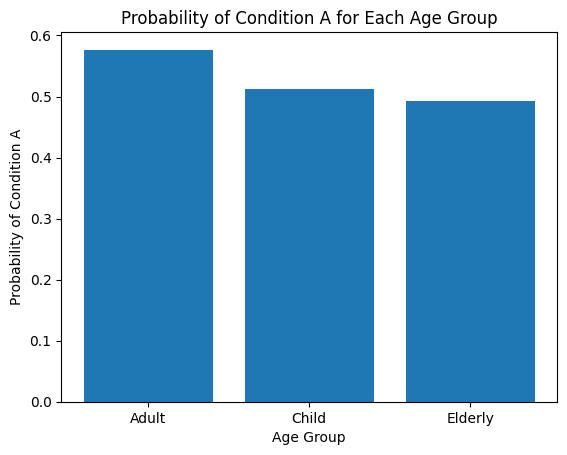

In [7]:
# Probability of a randomly selected patient having Condition A
prob_condition_a = df[df['Has Condition A'] == 'Yes'].shape[0] / df.shape[0]

# Probability of a patient from the Adult age group having Condition A
prob_adult_condition_a = df[(df['Has Condition A'] == 'Yes') & (df['Age Group'] == 'Adult')].shape[0] / df[df['Age Group'] == 'Adult'].shape[0]

# Marginal probability of a patient having Condition A
marginal_prob_condition_a = df[df['Has Condition A'] == 'Yes'].shape[0] / df.shape[0]

# Conditional probability of a patient having Condition A given they are from the Adult age group
conditional_prob_adult_condition_a = prob_adult_condition_a / prob_condition_a

# Results
print(f"Probability of a randomly selected patient having Condition A: {prob_condition_a:.2%}")
print(f"Probability of a patient from the Adult age group having Condition A: {prob_adult_condition_a:.2%}")
print(f"Marginal Probability of a patient having Condition A: {marginal_prob_condition_a:.2%}")
print(f"Conditional Probability of a patient having Condition A given they are from the Adult age group: {conditional_prob_adult_condition_a:.2f}\n")

# Bar graph for probability of having Condition A for each age group
age_groups_prob = df.groupby('Age Group')['Has Condition A'].apply(lambda x: (x == 'Yes').mean())
plt.bar(age_groups_prob.index, age_groups_prob)
plt.xlabel('Age Group')
plt.ylabel('Probability of Condition A')
plt.title('Probability of Condition A for Each Age Group')
plt.show()


In [8]:
#2
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generating the dataset
np.random.seed(42)
# Random hours between 1 and 5
hours_of_exercise = np.random.randint(1, 6, 100)  
# Random weight between 50 and 100 kg
initial_weight = np.random.randint(50, 100, 100)  
# Weight loss formula with some noise
weight_loss = hours_of_exercise * 0.4 + initial_weight * 0.02 + np.random.normal(0, 0.5, 100)  

data = {
    'Hours of Exercise': hours_of_exercise,
    'Initial Weight in kg': initial_weight,
    'Weight Loss in kg': weight_loss
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
df.head()

,Hours of Exercise,Initial Weight in kg,Weight Loss in kg
0,4,77,3.107811
1,5,56,3.292451
2,3,58,2.319956
3,5,57,3.019310
4,5,61,3.936758


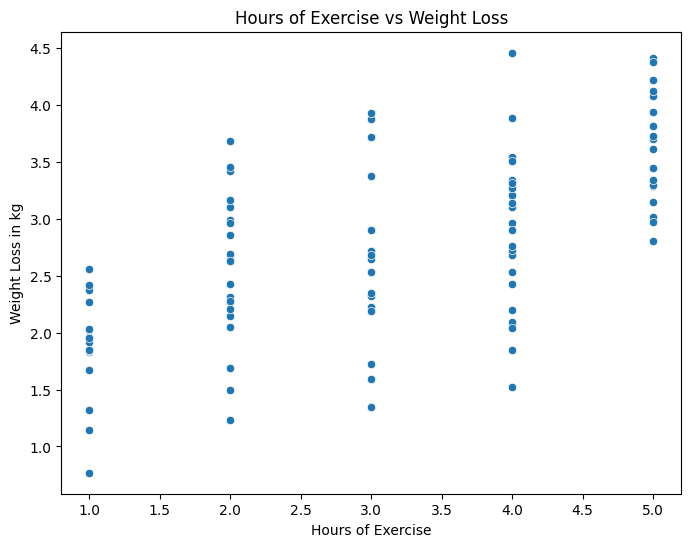

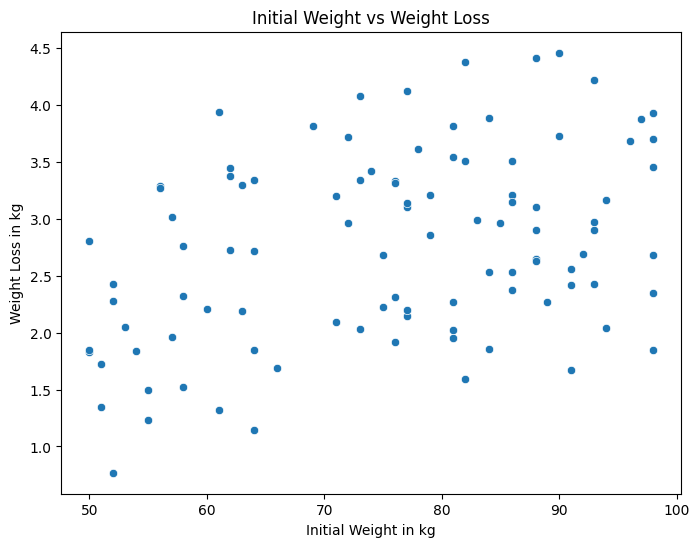

                            OLS Regression Results                            
Dep. Variable:      Weight Loss in kg   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     68.08
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.37e-19
Time:                        12:37:51   Log-Likelihood:                -78.058
No. Observations:                 100   AIC:                             162.1
Df Residuals:                      97   BIC:                             169.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1358 

In [5]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Hours of Exercise vs Weight Loss
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours of Exercise', y='Weight Loss in kg', data=df)
plt.title('Hours of Exercise vs Weight Loss')
plt.xlabel('Hours of Exercise')
plt.ylabel('Weight Loss in kg')
plt.show()
print("\n We noticed that weight loss has a positive relation with hours of exercise")

# Scatter plot: Initial Weight vs Weight Loss
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Initial Weight in kg', y='Weight Loss in kg', data=df)
plt.title('Initial Weight vs Weight Loss')
plt.xlabel('Initial Weight in kg')
plt.ylabel('Weight Loss in kg')
plt.show()

# Multiple Linear Regression
X = df[['Hours of Exercise', 'Initial Weight in kg']]
y = df['Weight Loss in kg']

# Add a constant to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


In [9]:
print("""The model explains a significant portion (58.4%) of the variance in weight loss. 
Both Hours of Exercise and Initial Weight in kg play a significant role in predicting weight loss. 
The model appears to be reasonable, given the significant variables and the moderate R-squared value.""")

The model explains a significant portion (58.4%) of the variance in weight loss. 
Both Hours of Exercise and Initial Weight in kg play a significant role in predicting weight loss. 
The model appears to be reasonable, given the significant variables and the moderate R-squared value.
